<a href="https://colab.research.google.com/github/abubakrsiddq/ImageDehazing/blob/main/models/novel/DenseDepth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ialhashim/DenseDepth.git

Cloning into 'DenseDepth'...
remote: Enumerating objects: 263, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 263 (delta 8), reused 15 (delta 4), pack-reused 242
Receiving objects: 100% (263/263), 12.13 MiB | 21.63 MiB/s, done.
Resolving deltas: 100% (127/127), done.


In [2]:
!wget https://s3-eu-west-1.amazonaws.com/densedepth/kitti.h5 -O ./DenseDepth/kitti.h5

--2021-05-08 09:12:14--  https://s3-eu-west-1.amazonaws.com/densedepth/kitti.h5
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.88.147
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.88.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172897384 (165M) [application/x-www-form-urlencoded]
Saving to: ‘./DenseDepth/kitti.h5’

./DenseDepth/kitti. 100%[===================>] 164.89M  11.5MB/s    in 16s     

2021-05-08 09:12:31 (10.1 MB/s) - ‘./DenseDepth/kitti.h5’ saved [172897384/172897384]



In [16]:
from keras.models import load_model
from layers import BilinearUpSampling2D
from utils import predict, load_images, display_images
from matplotlib import pyplot as plt
import keras

In [11]:
custom_objects = {'BilinearUpSampling2D': BilinearUpSampling2D, 'depth_loss_function': None}
model = load_model('kitti.h5', custom_objects=custom_objects, compile=False)

In [12]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.545962 to fit



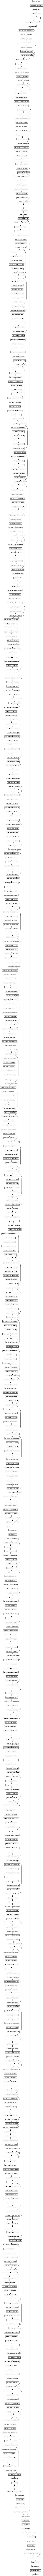

In [18]:
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [ ]:
!cd DenseDepth; python test.py

Using TensorFlow backend.
Loading model...
W0904 07:09:48.712383 139831627020160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 07:09:48.821621 139831627020160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0904 07:09:48.855617 139831627020160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 07:09:48.855851 139831627020160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session

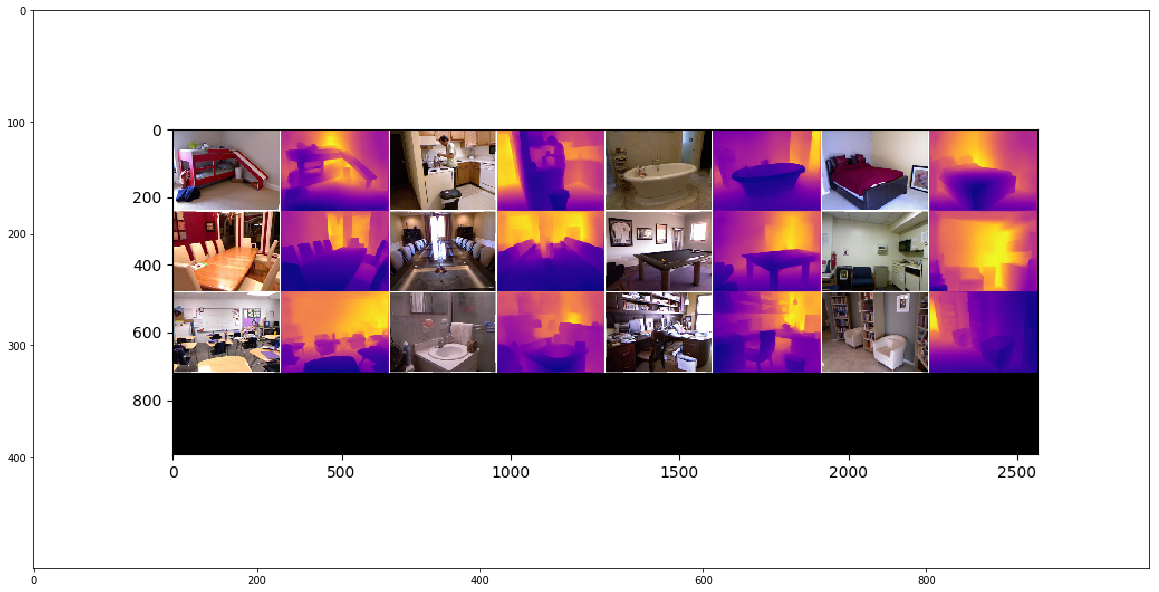

In [ ]:
!cd DenseDepth/PyTorch; python test_pytorch.py
from matplotlib import pyplot as plt
from skimage import io

plt.figure(figsize=(20,20))
plt.imshow( io.imread('./DenseDepth/test.png') )